<a href="https://colab.research.google.com/github/balamurugan213/Python-for-Data-science/blob/main/9_pandas_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pandas


## Loading dataset from Google Drive
Download the [dataset here](https://drive.google.com/file/d/1mJadvWigZmuOjtd-Df4UjYu8Wccwfqry/view?usp=sharing) and upload it to your own drive.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
def csv_to_df(filename):
  return pd.read_csv("/content/drive/My Drive/data/"+filename)

df = csv_to_df("googleplaystore.csv")

## Cleaning
Let us perform some data cleaning tasks

1. Remove all rows that have 'NaN' as their rating

In [3]:
print("Length of DataFrame before the removal of rows:",len(df))
df = df.dropna()
print("Length of DataFrame after the removal of rows:",len(df))

Length of DataFrame before the removal of rows: 10841
Length of DataFrame after the removal of rows: 9360


In [4]:
df.describe()

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [6]:
df = df.apply(pd.to_numeric, errors='ignore')
df.describe()

,Rating,Reviews
count,9360.000000,9.360000e+03
mean,4.191838,5.143767e+05
std,0.515263,3.145023e+06
min,1.000000,1.000000e+00
25%,4.000000,1.867500e+02
50%,4.300000,5.955000e+03
75%,4.500000,8.162750e+04
max,5.000000,7.815831e+07


There are still some columns that were not converted to float64 automatically. Let us try fixing one of them.

In [7]:
def fix_installs(install_str):
  install_str = install_str.replace("+","")
  install_str = install_str.replace(",","")
  return install_str

df["Installs"]= df["Installs"].apply(fix_installs)
df = df.apply(pd.to_numeric, errors='ignore')
df.describe()

,Rating,Reviews,Installs
count,9360.000000,9.360000e+03,9.360000e+03
mean,4.191838,5.143767e+05,1.790875e+07
std,0.515263,3.145023e+06,9.126637e+07
min,1.000000,1.000000e+00,1.000000e+00
25%,4.000000,1.867500e+02,1.000000e+04
50%,4.300000,5.955000e+03,5.000000e+05
75%,4.500000,8.162750e+04,5.000000e+06
max,5.000000,7.815831e+07,1.000000e+09


### Listing the average rating for each category

* getting a list of all categories
* looping through each category and filtering the rows belonging to that category
* finding the average rating for each filtered set of rows

In [8]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [9]:
for category in df["Category"].unique():
  print(category,df[(df["Category"] == category)]["Rating"].mean())

ART_AND_DESIGN 4.377049180327869
AUTO_AND_VEHICLES 4.19041095890411
BEAUTY 4.2785714285714285
BOOKS_AND_REFERENCE 4.346067415730337
BUSINESS 4.121452145214521
COMICS 4.155172413793104
COMMUNICATION 4.158536585365853
DATING 3.9707692307692306
EDUCATION 4.389032258064516
ENTERTAINMENT 4.126174496644296
EVENTS 4.435555555555556
FINANCE 4.13188854489164
FOOD_AND_DRINK 4.1669724770642205
HEALTH_AND_FITNESS 4.277104377104377
HOUSE_AND_HOME 4.197368421052632
LIBRARIES_AND_DEMO 4.1796875
LIFESTYLE 4.094904458598727
GAME 4.286326344576117
FAMILY 4.192382588774342
MEDICAL 4.1891428571428575
SOCIAL 4.255598455598456
SHOPPING 4.2596638655462185
PHOTOGRAPHY 4.19211356466877
SPORTS 4.223510971786833
TRAVEL_AND_LOCAL 4.10929203539823
TOOLS 4.047203274215553
PERSONALIZATION 4.33525641025641
PRODUCTIVITY 4.211396011396012
PARENTING 4.3
WEATHER 4.244
VIDEO_PLAYERS 4.063750000000001
NEWS_AND_MAGAZINES 4.1321888412017165
MAPS_AND_NAVIGATION 4.051612903225807


In [10]:
ratings = []
for category in df["Category"].unique():
  ratings.append([category,df[(df["Category"] == category)]["Rating"].mean()])

print(ratings)

[['ART_AND_DESIGN', 4.377049180327869], ['AUTO_AND_VEHICLES', 4.19041095890411], ['BEAUTY', 4.2785714285714285], ['BOOKS_AND_REFERENCE', 4.346067415730337], ['BUSINESS', 4.121452145214521], ['COMICS', 4.155172413793104], ['COMMUNICATION', 4.158536585365853], ['DATING', 3.9707692307692306], ['EDUCATION', 4.389032258064516], ['ENTERTAINMENT', 4.126174496644296], ['EVENTS', 4.435555555555556], ['FINANCE', 4.13188854489164], ['FOOD_AND_DRINK', 4.1669724770642205], ['HEALTH_AND_FITNESS', 4.277104377104377], ['HOUSE_AND_HOME', 4.197368421052632], ['LIBRARIES_AND_DEMO', 4.1796875], ['LIFESTYLE', 4.094904458598727], ['GAME', 4.286326344576117], ['FAMILY', 4.192382588774342], ['MEDICAL', 4.1891428571428575], ['SOCIAL', 4.255598455598456], ['SHOPPING', 4.2596638655462185], ['PHOTOGRAPHY', 4.19211356466877], ['SPORTS', 4.223510971786833], ['TRAVEL_AND_LOCAL', 4.10929203539823], ['TOOLS', 4.047203274215553], ['PERSONALIZATION', 4.33525641025641], ['PRODUCTIVITY', 4.211396011396012], ['PARENTING', 

In [11]:
ratings_df = pd.DataFrame(ratings, columns = ['Category', 'avg_rating'])
print(ratings_df)

               Category  avg_rating
0        ART_AND_DESIGN    4.377049
1     AUTO_AND_VEHICLES    4.190411
2                BEAUTY    4.278571
3   BOOKS_AND_REFERENCE    4.346067
4              BUSINESS    4.121452
5                COMICS    4.155172
6         COMMUNICATION    4.158537
7                DATING    3.970769
8             EDUCATION    4.389032
9         ENTERTAINMENT    4.126174
10               EVENTS    4.435556
11              FINANCE    4.131889
12       FOOD_AND_DRINK    4.166972
13   HEALTH_AND_FITNESS    4.277104
14       HOUSE_AND_HOME    4.197368
15   LIBRARIES_AND_DEMO    4.179688
16            LIFESTYLE    4.094904
17                 GAME    4.286326
18               FAMILY    4.192383
19              MEDICAL    4.189143
20               SOCIAL    4.255598
21             SHOPPING    4.259664
22          PHOTOGRAPHY    4.192114
23               SPORTS    4.223511
24     TRAVEL_AND_LOCAL    4.109292
25                TOOLS    4.047203
26      PERSONALIZATION    4

<Axes: xlabel='Category'>

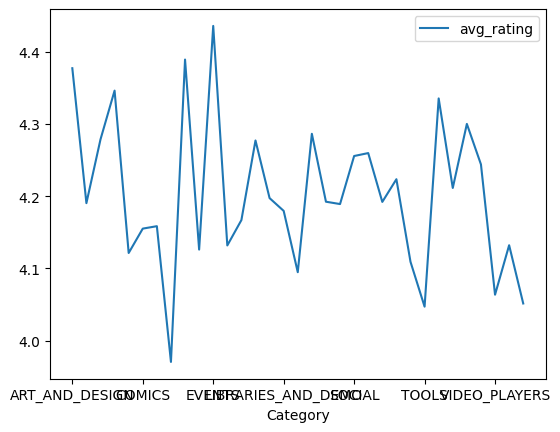

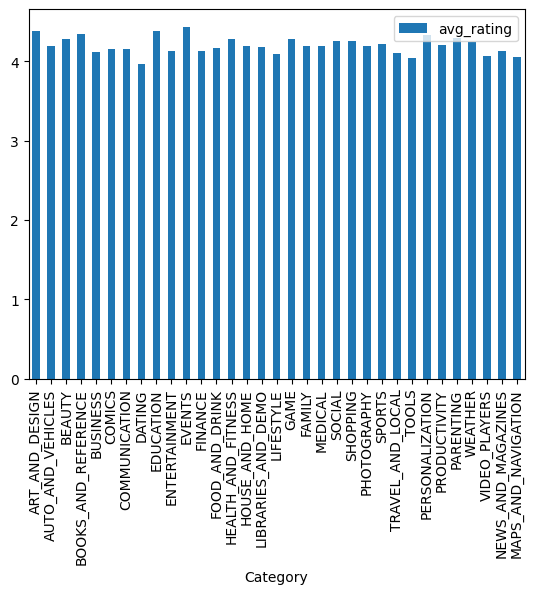

In [12]:
# ratings_df.plot("Category",drop=True,inplace=True)
ratings_df.plot(x="Category",y="avg_rating")
ratings_df.plot.bar(x="Category",y="avg_rating")

<Axes: xlabel='Category'>

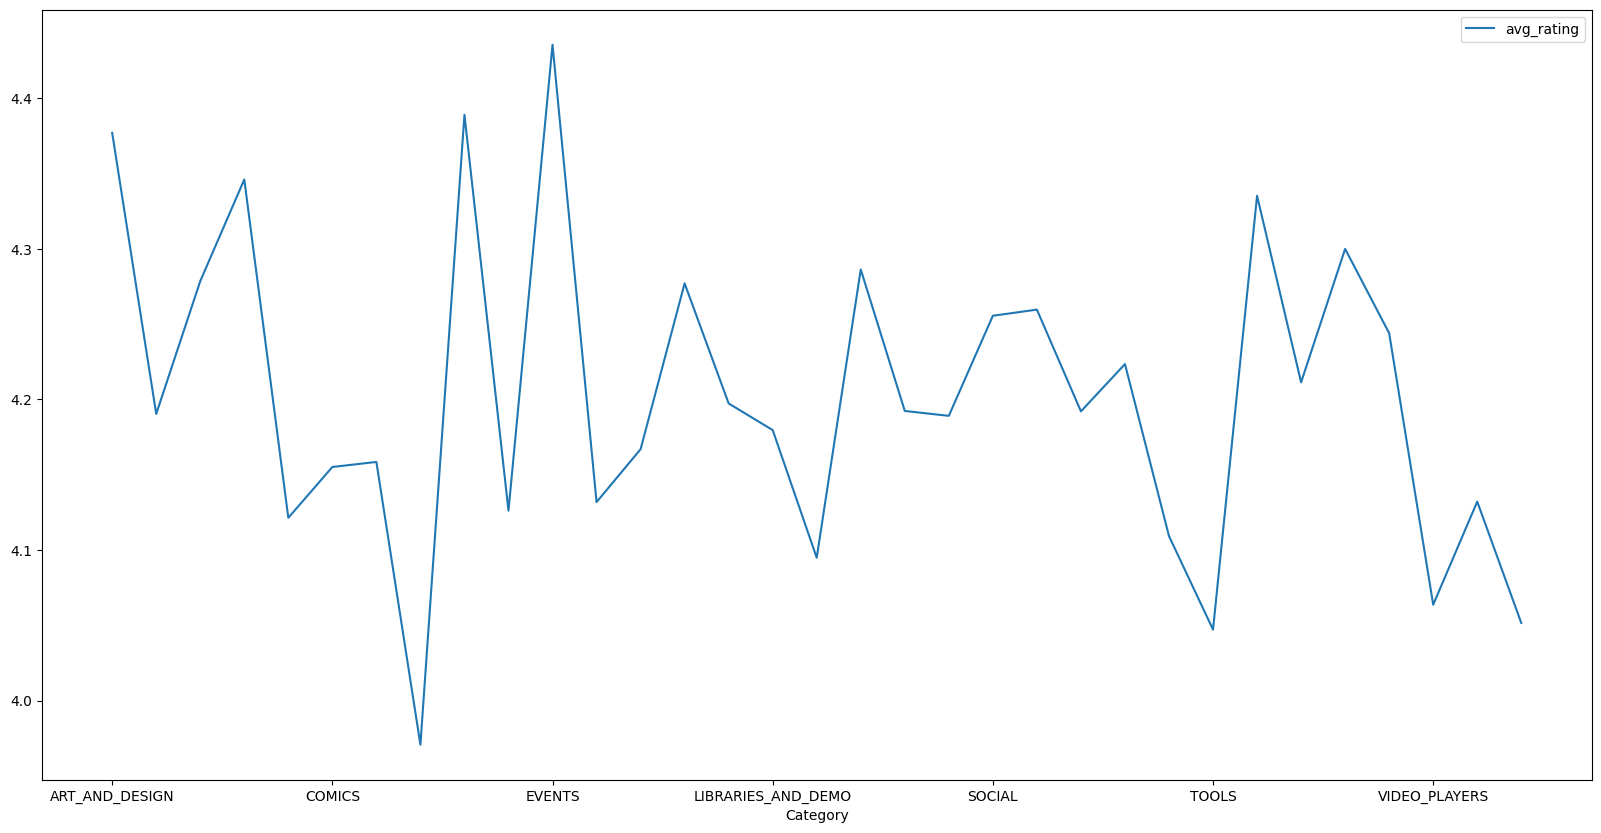

In [13]:
ratings_df.plot(x="Category",y="avg_rating",figsize=(20,10))